In [117]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation


from subprocess import check_output


from sklearn.model_selection import train_test_split
import sklearn

import seaborn as sns

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("train.csv")
test = pd.read_csv("train.csv")

In [120]:
X_test = test

In [102]:
X = df.drop(['ID','score'],axis=1)
y = df['score']


In [103]:
X = pd.DataFrame(X)
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,0.040776,2.247366,0.486094,-1.791148,-0.260466,-0.693494,-0.007988,-0.390353,0.342489,-0.160722,...,0.044653,0.116905,0.004497,0.045408,-0.160795,0.018927,0.038400,-0.224252,-0.095052,-0.060982
1,2.885314,-1.228567,-0.023254,1.243954,-0.276285,0.791822,-0.390133,0.048296,-0.007136,-0.381282,...,0.089593,0.111936,-0.050685,-0.163769,-0.068437,0.082455,-0.013019,-0.052774,-0.042545,-0.027698
2,2.612578,0.978922,0.402049,0.628482,0.481488,-0.421969,-0.090971,-0.496587,0.314399,-0.272321,...,0.045706,-0.066646,-0.092024,-0.078880,-0.005543,0.104462,0.136459,-0.064776,0.074138,0.030638
3,0.333623,0.658054,-0.747531,-0.505702,0.359609,0.459562,0.278906,0.078858,0.330526,0.250832,...,0.021199,0.121561,0.065324,0.114508,0.007231,0.055410,0.016136,-0.049182,-0.059409,-0.144704
4,-0.873343,-0.650602,0.336838,0.100677,-0.317427,-0.072732,-0.187683,0.493616,-0.234106,0.408980,...,0.052881,0.143080,0.051453,0.032550,-0.088987,0.003385,0.097682,-0.020679,-0.115271,-0.014201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34983,-1.574837,0.603624,0.607492,-0.655132,0.039056,-0.684888,-0.003937,-0.681982,0.348053,-0.536585,...,0.091858,0.103201,0.125239,0.050844,-0.023620,0.000394,-0.114906,-0.236198,0.023110,0.204743
34984,2.636006,-2.167586,1.139903,-1.175634,-0.159514,-0.776160,0.318481,-0.247046,-0.539630,-0.415432,...,0.053937,-0.002924,-0.047336,0.119949,-0.020814,0.077601,-0.186566,0.029815,-0.003559,0.073755
34985,0.346525,1.125346,-0.373337,1.092373,1.080213,0.153022,-0.036266,0.230058,0.272783,-0.118605,...,0.036403,-0.031702,0.050574,-0.014162,0.008040,0.049315,0.095176,0.015352,0.050573,-0.149185
34986,1.165356,3.261923,-0.482071,0.154124,0.891463,-0.100646,0.034768,0.090878,-0.412094,0.270255,...,-0.087733,-0.033497,0.118793,-0.016985,0.078523,0.001277,-0.015611,-0.015703,-0.018589,0.068585


In [104]:
print(type(y))
y



<class 'pandas.core.series.Series'>


0        0.0
1        3.0
2        0.0
3        3.0
4        3.0
        ... 
34983    3.0
34984    4.0
34985    1.0
34986    0.0
34987    4.0
Name: score, Length: 34988, dtype: float64

In [105]:
total_rows, total_columns = X.shape

In [123]:
class LinearRegression_Custom:
    
    # Constructor
    def __init__(self, X, y, lr=0.001, n_iter=1000):
        
        self.X = X
        self.y = y
        self.lr = lr
        self.n_iter = n_iter
        self.theta = np.zeros(shape = (self.X.shape[1],))
        self.error_list = []
        
    # 1. Predictions
    def predictions(self, data):
        
        return np.dot(data, self.theta)
    
    # 2. Loss Function
    def loss_function(self):
        
        preds = self.predictions(data=self.X)
        act = self.y
        
        mse = np.mean((act-preds)**2)
        
        return mse
    
    # 3. Gradient
    def gradient(self):
        
        preds = self.predictions(data=self.X)
        act = self.y
        m = self.X.shape[0]
        
        error = (act - preds)
        
        return -2*(np.dot(self.X.T, error)/m)
    
    # 4. Gradient Descent
    def train(self):
        
        for _ in range(self.n_iter):
            
            # Compute gradient
            grad = self.gradient()
            
            # Calculate Error
            error = self.loss_function()
            self.error_list.append(error)
            
            # perform the gradient descent algorithm
            self.theta = self.theta - self.lr*grad
            
    # 5. Compute the R squared Score
    def score_R2(self, data, test):
        
        '''
        R2 Score = 1 - summation((actual - predictions)**2)/summation((actual - mean)**2)
        '''
        
        # 1. Make Predictions
        preds = self.predictions(data=data)
        act = test
        
        # 2. Compute RSS: Residula Sum Squared
        rss = np.sum((preds - act)**2)
        
        # 3. Cmpute TSS: Total Squared Error
        tss = np.sum((preds - np.mean(act))**2)
        
        # 4. Compute R Squared
        r2_score = 1 - (rss/tss)
        
        return r2_score 


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [125]:
type(X)
X.shape

(34988, 64)

In [126]:
y

0        0.0
1        3.0
2        0.0
3        3.0
4        3.0
        ... 
34983    3.0
34984    4.0
34985    1.0
34986    0.0
34987    4.0
Name: score, Length: 34988, dtype: float64

In [127]:
lr = LinearRegression_Custom(X_train, y_train, lr = 0.1, n_iter=500)
lr.train()


In [128]:
# Make Predictions
y_preds = lr.predictions(data=X_test)


In [130]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)


ValueError: operands could not be broadcast together with shapes (8747,) (200,) 

In [131]:
print(y_preds)


[-0.11130288  1.02934834 -1.15421951 ...  0.20466546  0.65540416
  1.20800669]


In [132]:
print(sklearn.metrics.mean_squared_error(y_test, y_preds))


10.643704561001755


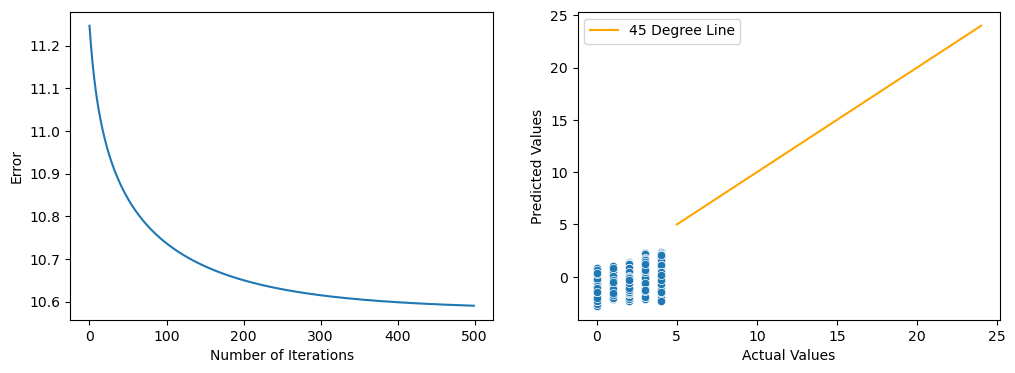

In [133]:
# Plot the predictions with actual values and plot the error as well.

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(lr.error_list)
sns.scatterplot(x=y_test, y=y_preds, ax=ax[1])
ax[1].plot(np.arange(5.0, 25.0), np.arange(5.0, 25.0), color='orange', label="45 Degree Line")
ax[0].set_xlabel("Number of Iterations")
ax[0].set_ylabel("Error")
ax[1].set_xlabel("Actual Values")
ax[1].set_ylabel("Predicted Values")
plt.legend()
plt.show()
